# Analysis

We perform various analyses of our network in this notebook.

In [1]:
import networkx as nx
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm

In [2]:
# read in graph
with open('../data/sampled_undirected.gpickle', 'rb') as handle:
    g = pickle.load(handle)

In [4]:
# read in data
papers = pd.read_csv('../data/papers_processed.csv')
edges_cc = pd.read_csv('../data/edges_cc_dates.csv')
edges_pc = pd.read_csv('../data/edges_pc_dates.csv')
edges_pp = pd.read_csv('../data/edges_pp_dates.csv')
edges_pp['src'] = edges_pp['src'].astype(str)
edges_pp['dst'] = edges_pp['dst'].astype(str)
valid_concepts = pd.read_csv('../data/valid_concepts.csv')
valid_papers = pd.read_csv('../data/valid_papers.csv')

In [5]:
# drop all edges and nodes not in the sampled graph
nodes = set(g.nodes())
papers = papers[papers['id'].isin(nodes)].reset_index(drop = True)
valid_papers = valid_papers[valid_papers['paper'].isin(nodes)].reset_index(drop = True)
valid_concepts = valid_concepts[valid_concepts['CUI'].isin(nodes)].reset_index(drop = True)
edges_cc = edges_cc[(edges_cc['src'].isin(nodes)) & (edges_cc['dst'].isin(nodes))].reset_index(drop = True)
edges_pc = edges_pc[(edges_pc['src'].isin(nodes)) & (edges_pc['dst'].isin(nodes))].reset_index(drop = True)
edges_pp = edges_pp[(edges_pp['src'].isin(nodes)) & (edges_pp['dst'].isin(nodes))].reset_index(drop = True)

In [6]:
num_nodes = g.number_of_nodes()
num_edges = g.number_of_edges()
print('Number of nodes: {}; number of edges: {}; average degree: {}'.format(num_nodes, num_edges, float(num_edges)/num_nodes))
print('Number of concept nodes: {}; number of paper nodes: {}'.format(len(valid_concepts), len(valid_papers)))
print('Number of cc edges: {}; number of pc edges: {}; number of pp edges: {}'.format(len(edges_cc), len(edges_pc), len(edges_pp)))

Number of nodes: 42062; number of edges: 1744025; average degree: 41.463197185107695
Number of concept nodes: 11741; number of paper nodes: 30321
Number of cc edges: 146704; number of pc edges: 1502372; number of pp edges: 94967


## Degree Analysis

In [7]:
# create dictionaries to store degree attributes
concept_degree_dict = {}
for concept in valid_concepts.values:
    concept_degree_dict[concept[0]] = {'cc':0, 'pc': 0, 'total':0}
paper_degree_dict = {}
for paper in valid_papers.values:
    paper_degree_dict[paper[0]] = {'pc':0, 'receiving_citation': 0, 'outgoing_citation': 0, 'total':0}

In [8]:
# record number cc edge degree and pc edge degree
for row in tqdm(edges_cc.values):
    concept_degree_dict[row[0]]['cc']+=1
    concept_degree_dict[row[1]]['cc']+=1
    concept_degree_dict[row[0]]['total']+=1
    concept_degree_dict[row[1]]['total']+=1
for concept in tqdm(edges_pc['dst'].values):
    concept_degree_dict[concept]['pc']+=1
    concept_degree_dict[concept]['total']+=1

  0%|          | 0/146704 [00:00<?, ?it/s]

  0%|          | 0/1502372 [00:00<?, ?it/s]

In [9]:
# record pc edge degree and number of outgoing and receiving citations
for paper in tqdm(edges_pc['src'].values):
    paper_degree_dict[paper]['pc']+=1
    paper_degree_dict[paper]['total']+=1
for paper in tqdm(edges_pp['src'].values):
    paper_degree_dict[str(paper)]['outgoing_citation']+=1
    paper_degree_dict[str(paper)]['total']+=1
for paper in tqdm(edges_pp['dst'].values):
    paper_degree_dict[str(paper)]['receiving_citation']+=1
    paper_degree_dict[str(paper)]['total']+=1

  0%|          | 0/1502372 [00:00<?, ?it/s]

  0%|          | 0/94967 [00:00<?, ?it/s]

  0%|          | 0/94967 [00:00<?, ?it/s]

In [10]:
avg_degree_c = np.average([x['total'] for x in concept_degree_dict.values()])
std_degree_c = np.std([x['total'] for x in concept_degree_dict.values()])
avg_degree_p = np.average([x['total'] for x in paper_degree_dict.values()])
std_degree_p = np.std([x['total'] for x in paper_degree_dict.values()])

print('Average concept node degree: {} +/- {}'.format(avg_degree_c, std_degree_c))
print('Average paper node degree: {} +/- {}'.format(avg_degree_p, std_degree_p))
print()


avg_cc = np.average([x['cc'] for x in concept_degree_dict.values()])
std_cc = np.std([x['cc'] for x in concept_degree_dict.values()])
avg_pc_c = np.average([x['pc'] for x in concept_degree_dict.values()])
std_pc_c = np.std([x['pc'] for x in concept_degree_dict.values()])

print('Average concept-concept edge degree: {} +/- {}'.format(avg_cc, std_cc))
print('Average paper-concept edge degree (concept nodes): {} +/- {}'.format(avg_pc_c, std_pc_c))
print()

avg_pc_p = np.average([x['pc'] for x in paper_degree_dict.values()])
std_pc_p = np.std([x['pc'] for x in paper_degree_dict.values()])
avg_receiving = np.average([x['receiving_citation'] for x in paper_degree_dict.values()])
std_receiving = np.std([x['receiving_citation'] for x in paper_degree_dict.values()])
avg_outgoing = np.average([x['outgoing_citation'] for x in paper_degree_dict.values()])
std_outgoing = np.std([x['outgoing_citation'] for x in paper_degree_dict.values()])

print('Average paper-concept edge degree (paper nodes): {} +/- {}'.format(avg_pc_p, std_pc_p))
print('Average receiving citations: {} +/- {}'.format(avg_receiving, std_receiving))
print('Average outgoing citations: {} +/- {}'.format(avg_outgoing, std_outgoing))

Average concept node degree: 152.94949322885614 +/- 496.5019169838592
Average paper node degree: 55.81300089047195 +/- 29.031829536747242

Average concept-concept edge degree: 24.990034920364536 +/- 82.59681099029552
Average paper-concept edge degree (concept nodes): 127.9594583084916 +/- 456.1687375332126

Average paper-concept edge degree (paper nodes): 49.548893506150854 +/- 22.542878802325145
Average receiving citations: 3.132053692160549 +/- 17.03043142066823
Average outgoing citations: 3.132053692160549 +/- 8.133676816747872


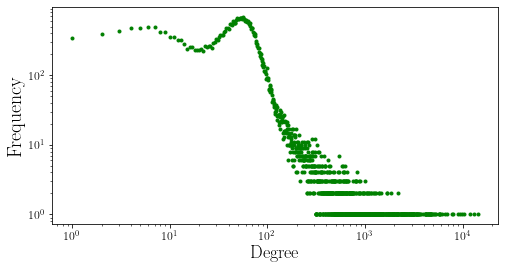

In [11]:
# create degree frequency plot
degree_freq = nx.degree_histogram(g)
degrees = range(len(degree_freq))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(8, 4))
plt.loglog(degrees, degree_freq,'go', markersize=3) 
plt.xlabel(r'Degree', fontsize=18)
plt.ylabel(r'Frequency', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axis('tight')
fig.savefig('../images/degree_distribution.eps', dpi=1200, format='eps')

## Link Formation Date Analysis

In [12]:
# group entries by year
cc_year = edges_cc.groupby('year').count()['src']
pc_year = edges_pc.groupby('year').count()['src']
pp_year = edges_pp.groupby('year').count()['src']

In [14]:
# cc_year has longest range, so we can make it the x-axis
x_axis = list(range(int(cc_year.index[0]), int(cc_year.index[-1])+1))

In [15]:
# create y-values for each type of link at each year
cc = []
for x in x_axis:
    if x in cc_year.index:
        cc.append(cc_year[x])
    else:
        cc.append(0)
pc = []
for x in x_axis:
    if x in pc_year.index:
        pc.append(pc_year[x])
    else:
        pc.append(0)
pp = []
for x in x_axis:
    if x in pp_year.index:
        pp.append(pp_year[x])
    else:
        pp.append(0)
cc = np.array(cc)
pc = np.array(pc)
pp = np.array(pp)

In [16]:
# plots for legend
blue_patch = mpatches.Patch(color='#87cfff', label='Paper-concept edges')
orange_patch = mpatches.Patch(color='#f05735', label='Concept-concept edges')
green_patch = mpatches.Patch(color='#66e83f', label='Paper-paper edges')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


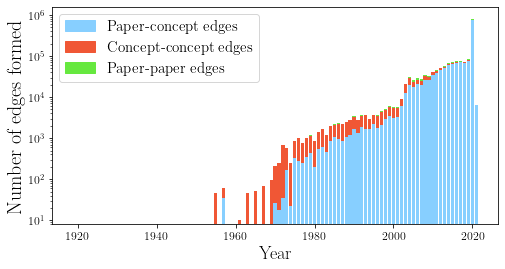

In [17]:
# plot stacked log-scale bar chart
fig = plt.figure(figsize = (8, 4))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.bar(x_axis, pc, color='#87cfff')
plt.bar(x_axis, cc, bottom=pc, color='#f05735')
plt.bar(x_axis, pp, bottom=pc+cc, color='#66e83f')
plt.xlabel(r'Year', fontsize=18)
plt.ylabel(r'Number of edges formed', fontsize=20)
plt.legend(handles=[blue_patch, orange_patch, green_patch], loc='upper left', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yscale('log')
plt.axis('tight')
fig.savefig('../images/link_formation_date_plot.eps', dpi=1200, format='eps')